In [22]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data = pd.read_csv('diabetes.csv')

# Wyświetlenie pierwszych kilku wierszy danych
print(data.head())

# Wyświetlenie podstawowych informacji o danych
print(data.info())

# Podsumowanie statystyk opisowych
print(data.describe())

# Sprawdzenie liczby brakujących wartości
print(data.isnull().sum())

# liczba atrybutów
print(data.shape)

# rodzaje atrybutów
print()


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

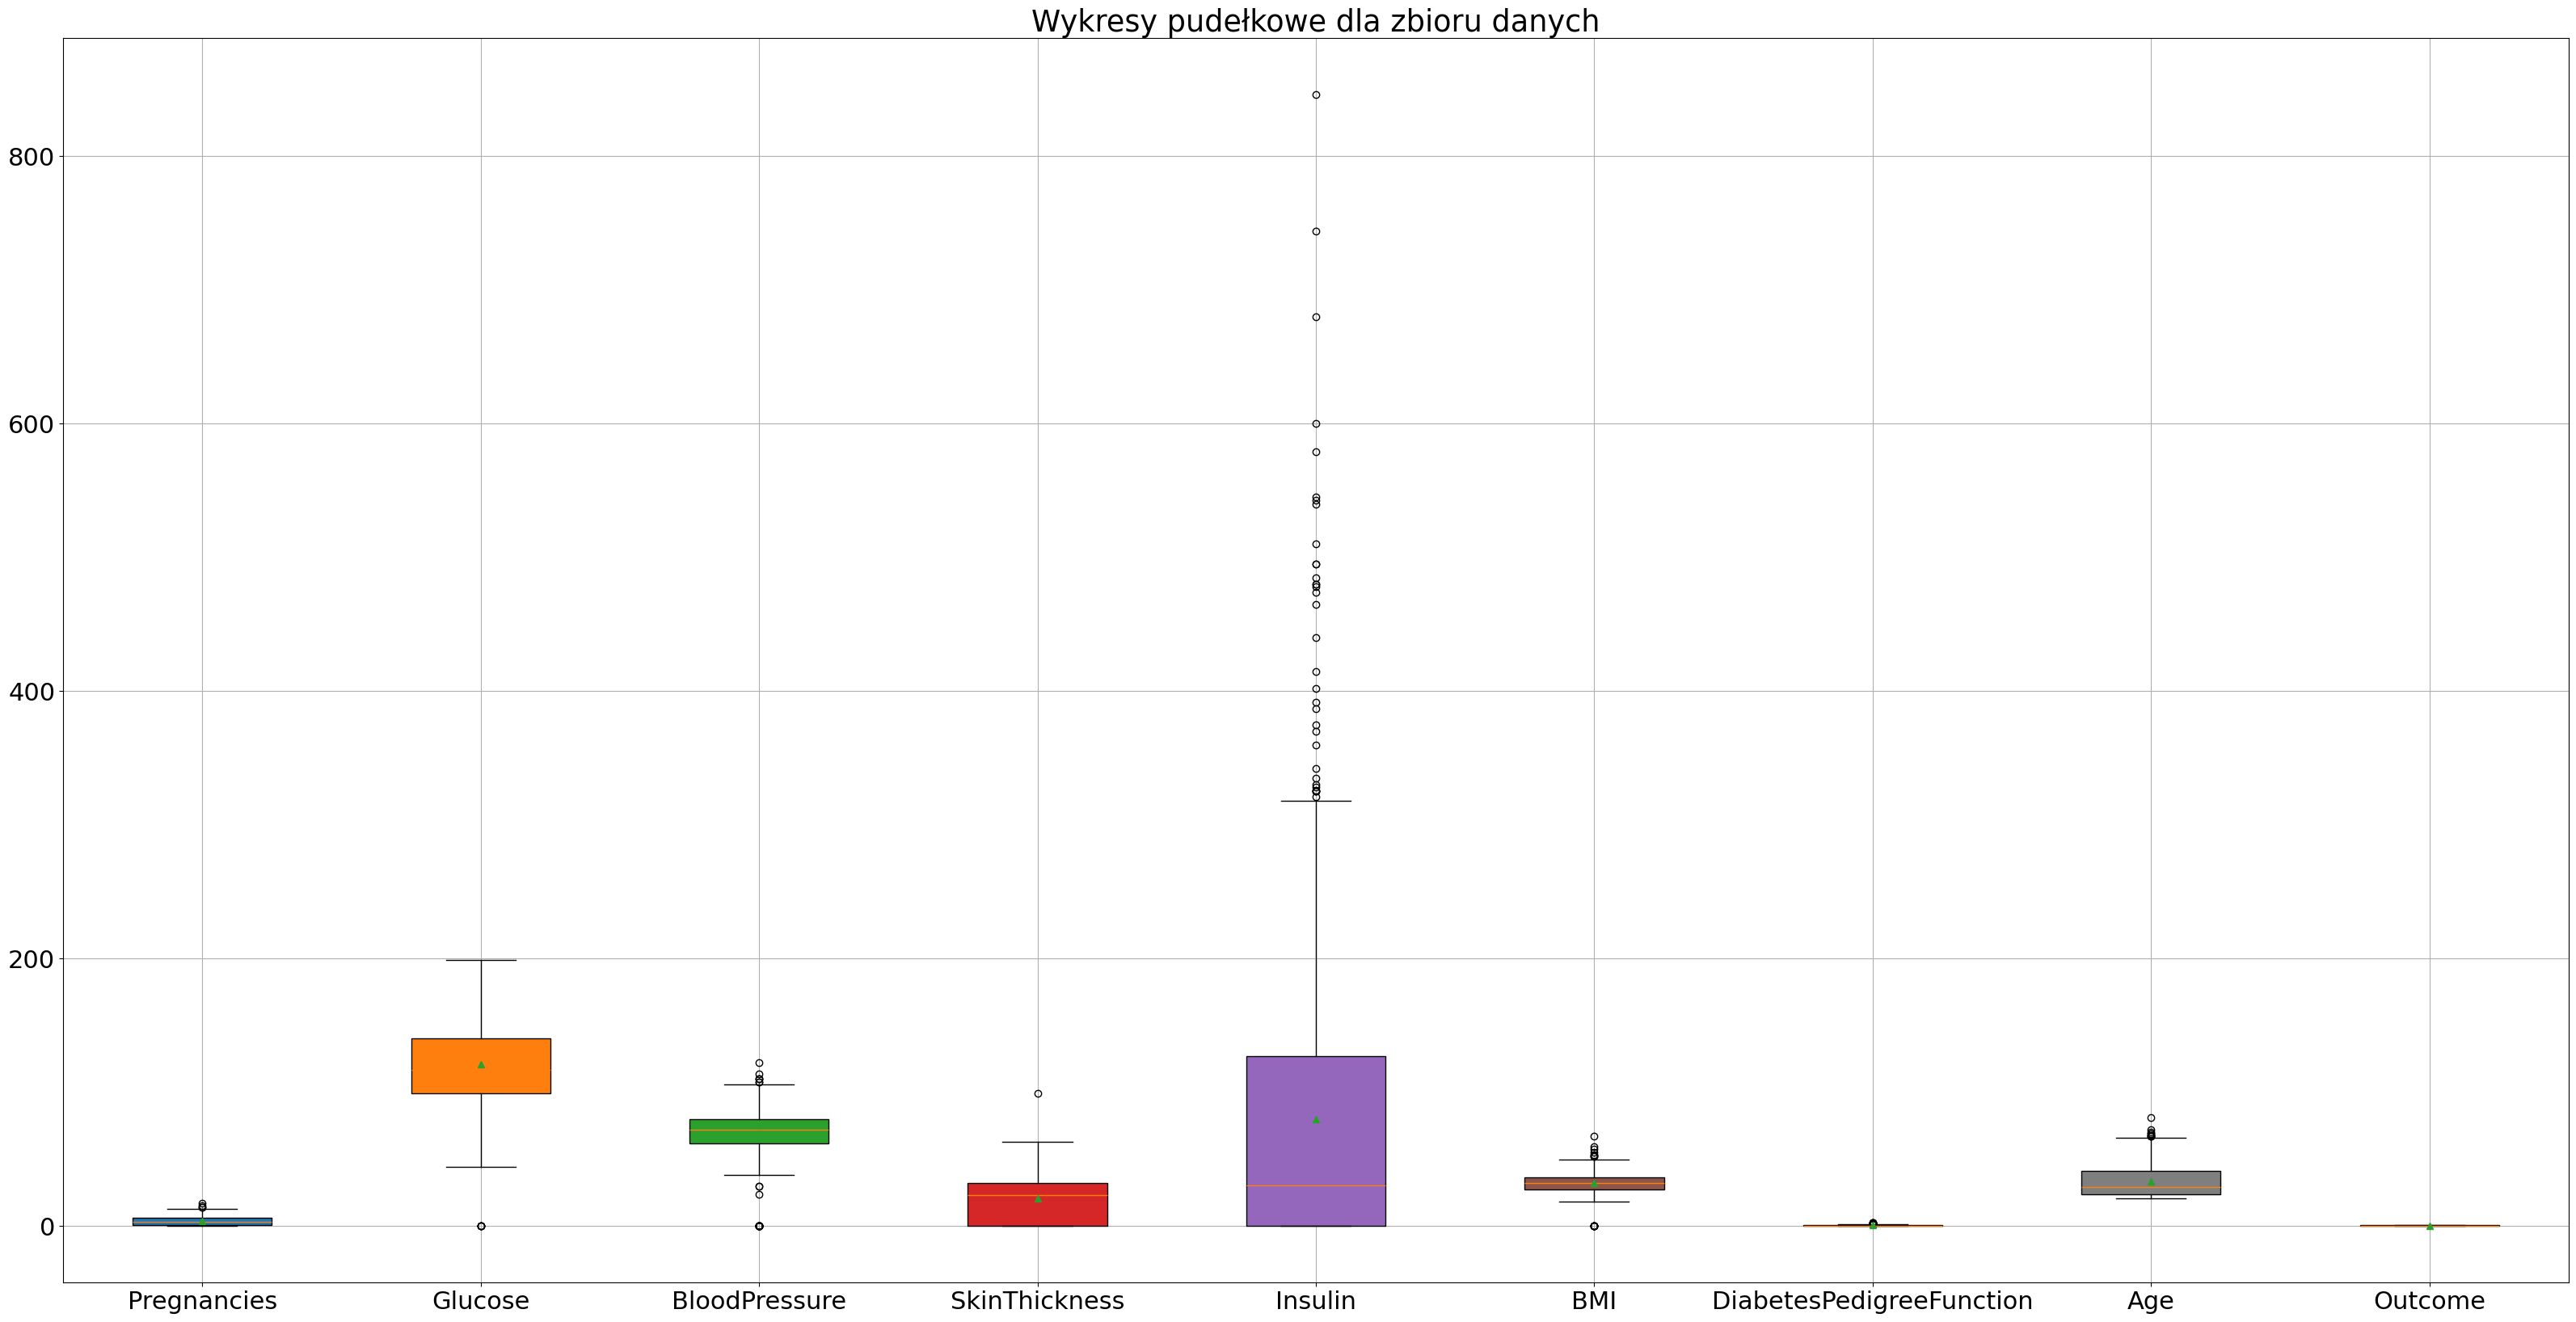

In [24]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(40, 20))

box = plt.boxplot(data.select_dtypes(include=[float, int]).values, showmeans=True, showcaps=True, labels=data.select_dtypes(include=[float, int]).columns, patch_artist=True)
plt.title('Wykresy pudełkowe dla zbioru danych')
plt.grid()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.savefig('wykresy_pudelkowe.svg', format='svg')
plt.show()

- Wykres pokazuje, że w niektórych zmiennych, zwłaszcza w Insulin, istnieje duża liczba wartości odstających, co wskazuje na możliwe ekstremalne wartości w danych. Również SkinThickness posiada widoczne wartości odstające. To może wskazywać na błędy w danych lub na rzadkie, ale ważne przypadki kliniczne.
- Różnice w skalach zmiennych sugerują potrzebę normalizacji danych przed ich dalszym modelowaniem.

In [33]:
data = pd.read_csv('diabetes.csv')

X = data.drop('Outcome', axis=1)  # Usuwamy kolumnę 'Outcome' bo to nasz cel predykcji
y = data['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standaryzacja jest ważna dla PCA

Ze standaryzacją:

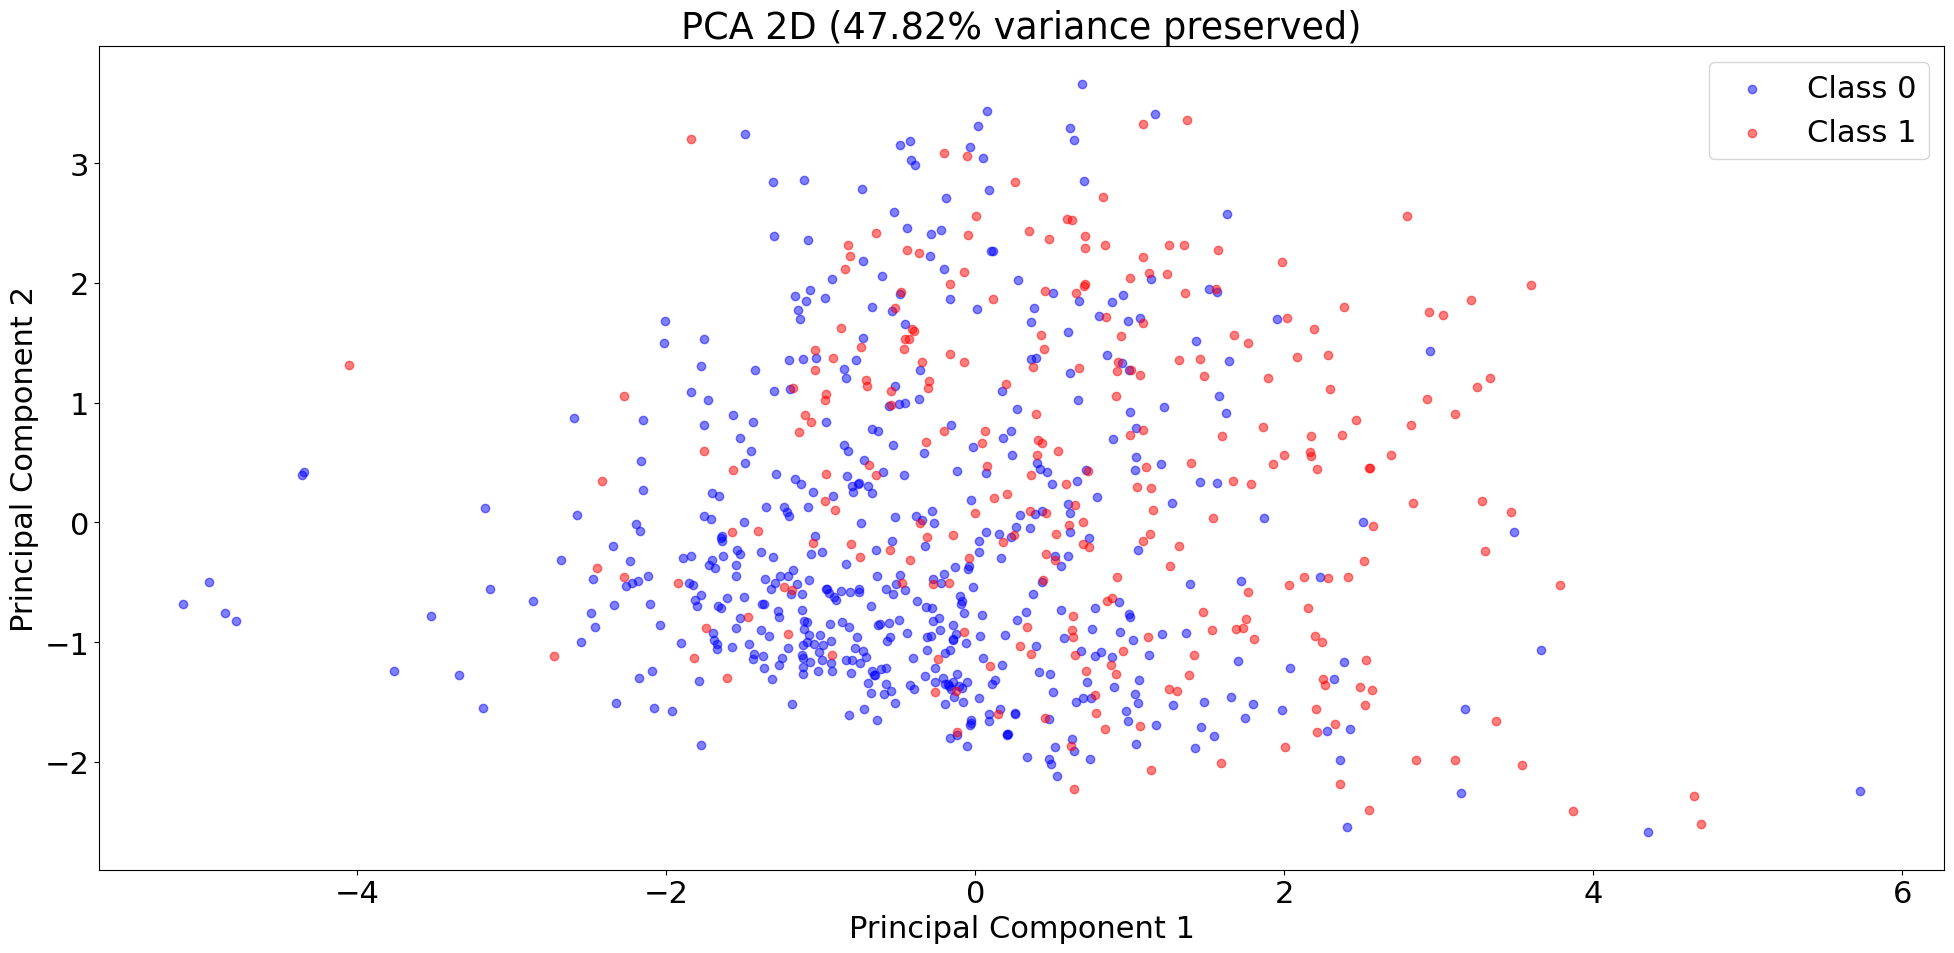

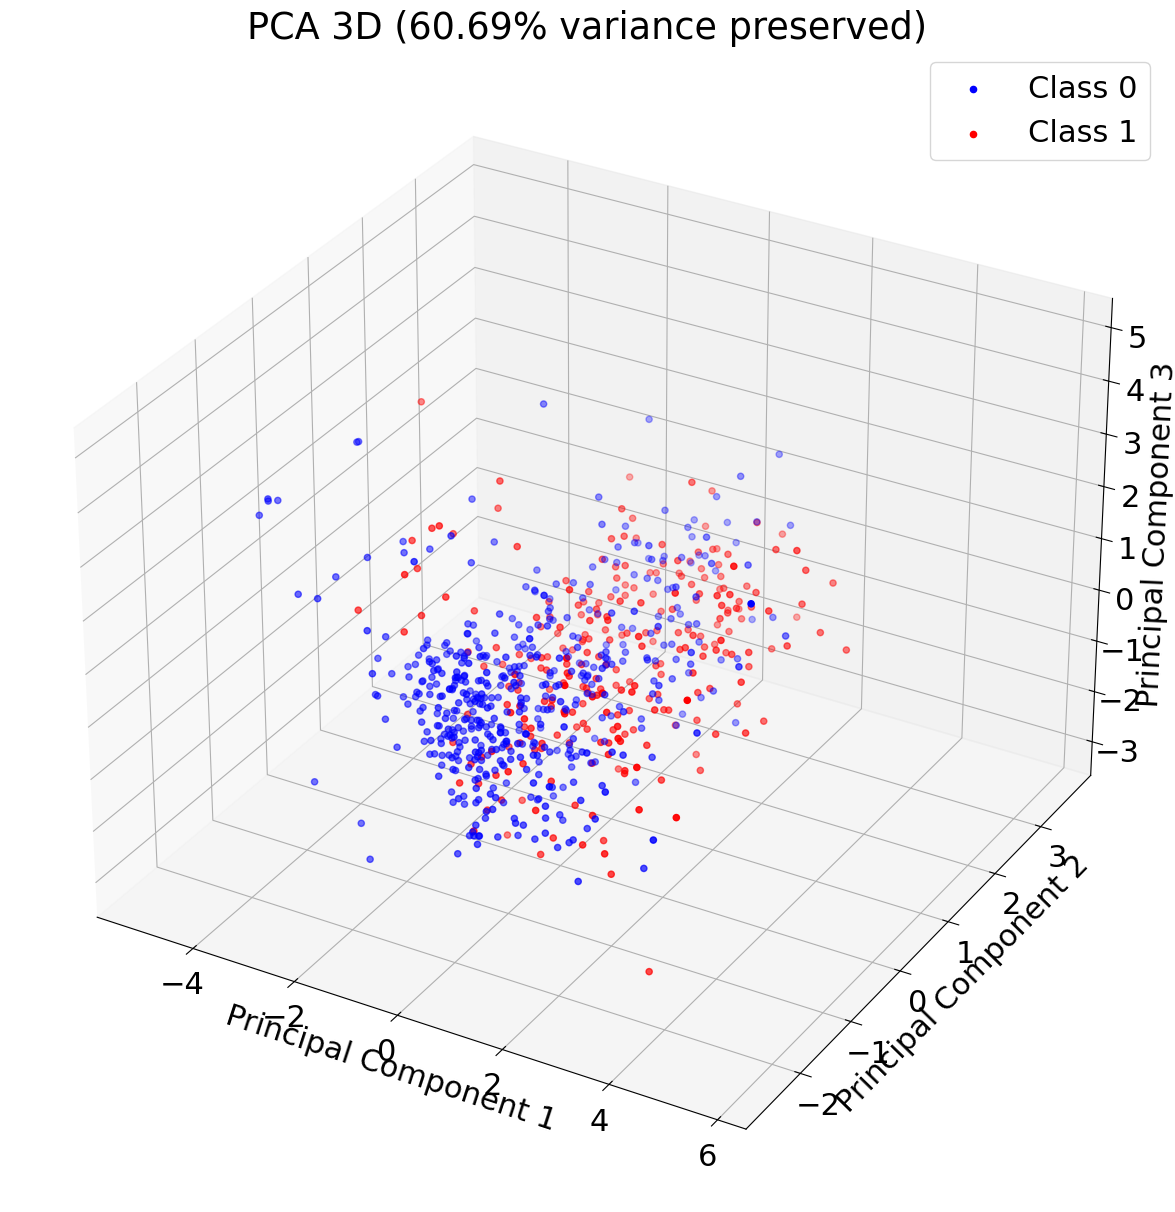

In [36]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

X_pca_2d = pca_2d.fit_transform(X_scaled)
X_pca_3d = pca_3d.fit_transform(X_scaled)

variance_ratio_2d = sum(pca_2d.explained_variance_ratio_) * 100
variance_ratio_3d = sum(pca_3d.explained_variance_ratio_) * 100

plt.figure(figsize=(20, 10))
plt.scatter(X_pca_2d[y == 0, 0], X_pca_2d[y == 0, 1], c='b', label='Class 0', alpha=0.5)
plt.scatter(X_pca_2d[y == 1, 0], X_pca_2d[y == 1, 1], c='r', label='Class 1', alpha=0.5)
plt.title('PCA 2D ({}% variance preserved)'.format(round(variance_ratio_2d, 2)))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[y == 0, 0], X_pca_3d[y == 0, 1], X_pca_3d[y == 0, 2], c='b', label='Class 0')
ax.scatter(X_pca_3d[y == 1, 0], X_pca_3d[y == 1, 1], X_pca_3d[y == 1, 2], c='r', label='Class 1')
plt.title('PCA 3D ({}% variance preserved)'.format(round(variance_ratio_3d, 2)))
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.labelpad = 40
plt.legend()
plt.show()


Bez standaryzacji:

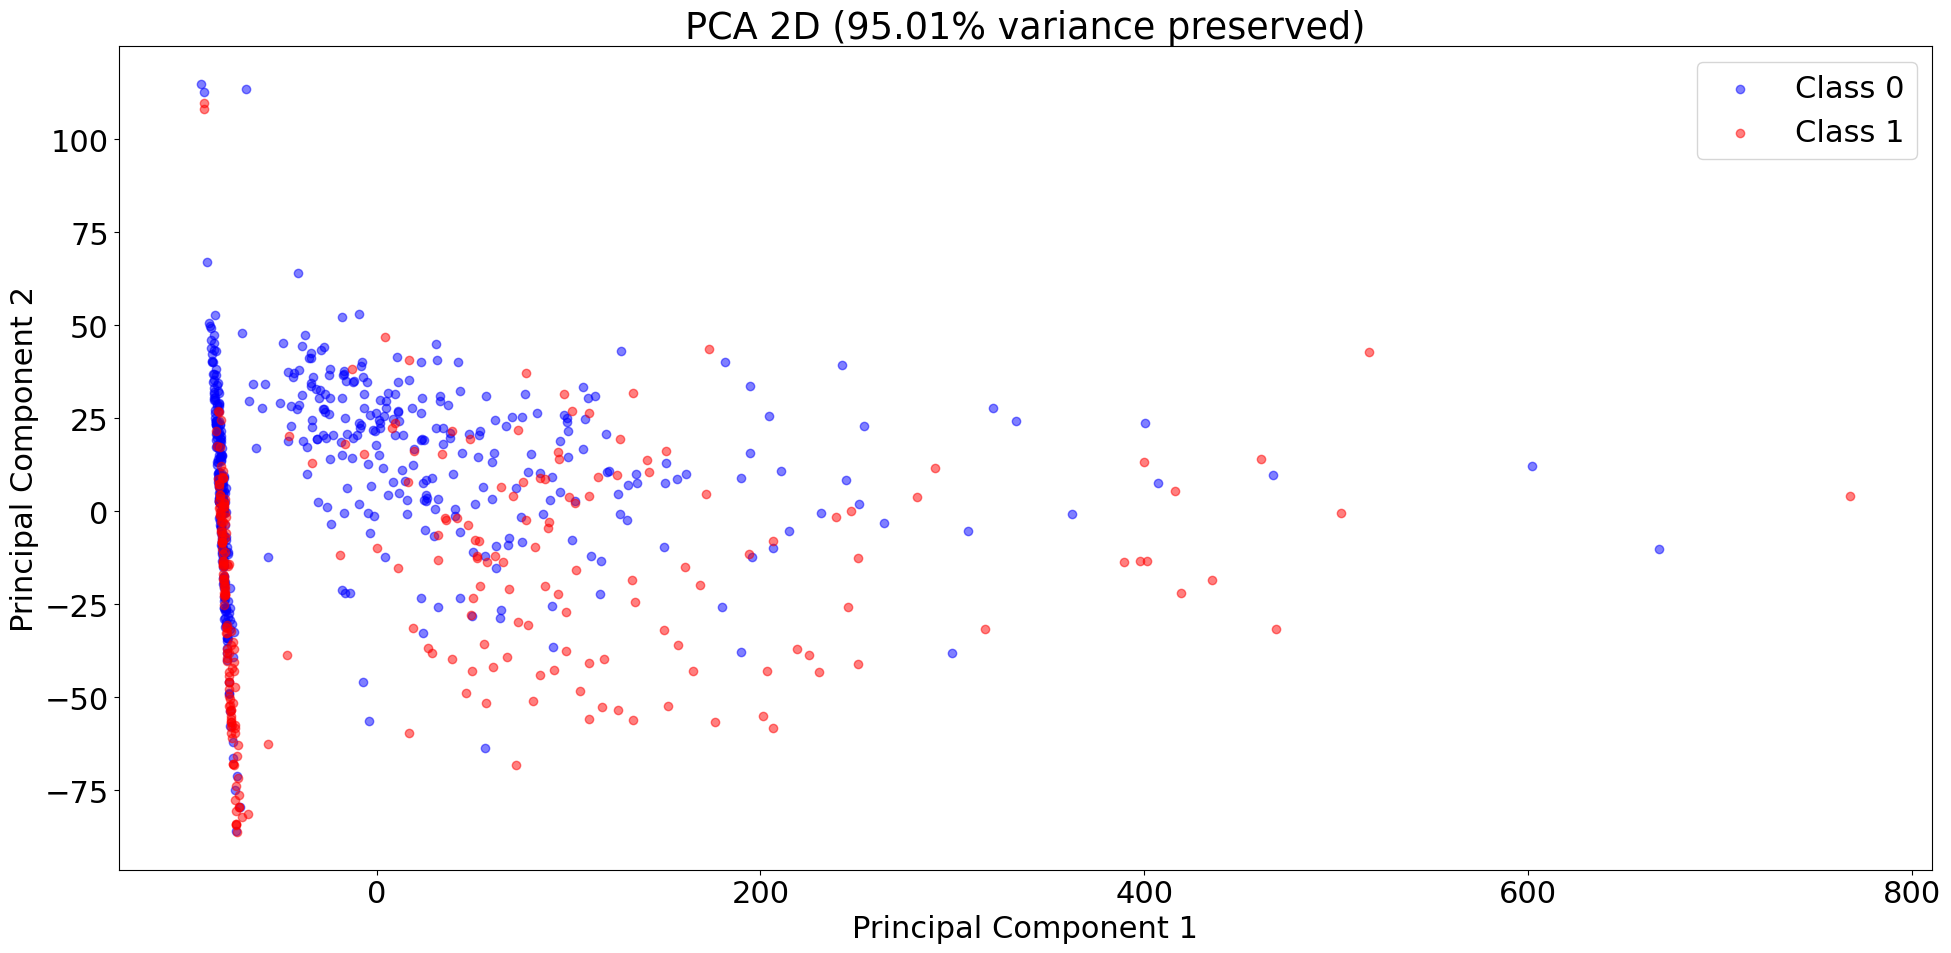

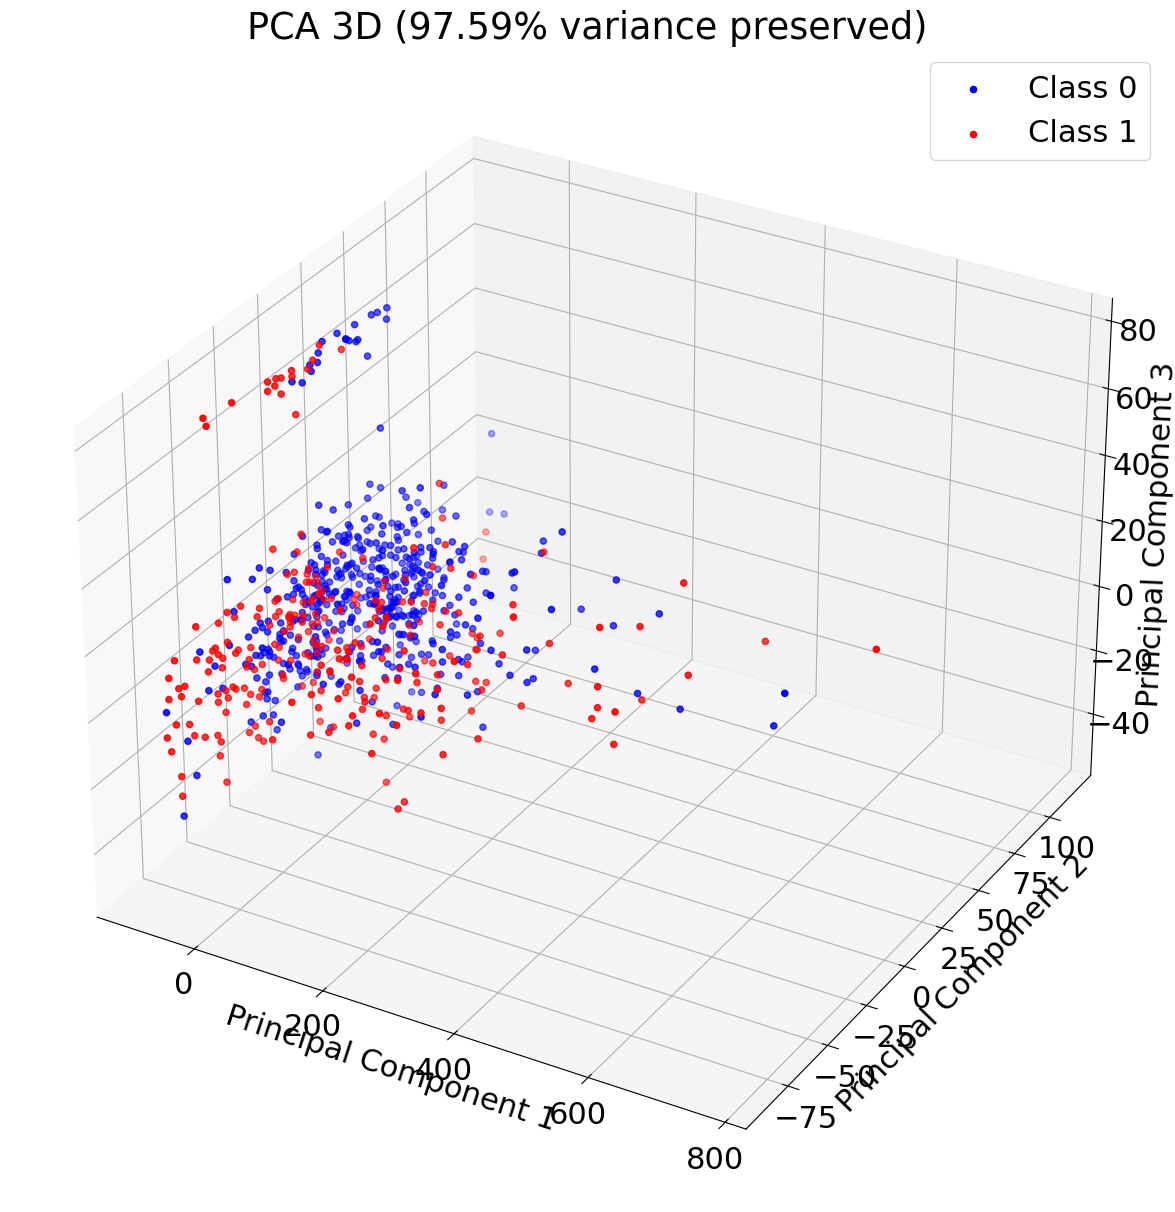

In [37]:
X_pca_2d = pca_2d.fit_transform(X)
X_pca_3d = pca_3d.fit_transform(X)

variance_ratio_2d = sum(pca_2d.explained_variance_ratio_) * 100
variance_ratio_3d = sum(pca_3d.explained_variance_ratio_) * 100

plt.figure(figsize=(20, 10))
plt.scatter(X_pca_2d[y == 0, 0], X_pca_2d[y == 0, 1], c='b', label='Class 0', alpha=0.5)
plt.scatter(X_pca_2d[y == 1, 0], X_pca_2d[y == 1, 1], c='r', label='Class 1', alpha=0.5)
plt.title('PCA 2D ({}% variance preserved)'.format(round(variance_ratio_2d, 2)))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[y == 0, 0], X_pca_3d[y == 0, 1], X_pca_3d[y == 0, 2], c='b', label='Class 0')
ax.scatter(X_pca_3d[y == 1, 0], X_pca_3d[y == 1, 1], X_pca_3d[y == 1, 2], c='r', label='Class 1')
plt.title('PCA 3D ({}% variance preserved)'.format(round(variance_ratio_3d, 2)))
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.labelpad = 40
plt.legend()
plt.show()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(n_neighbors=5)
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)

dt_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
nn_classifier.fit(X_train, y_train)

MLPClassifier(max_iter=300)

In [39]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

In [40]:
dt_results = evaluate_model(dt_classifier, X_test, y_test)
knn_results = evaluate_model(knn_classifier, X_test, y_test)
nn_results = evaluate_model(nn_classifier, X_test, y_test)

In [41]:
print("Drzewo decyzyjne:", dt_results)
print("KNN:", knn_results)
print("Sieci neuronowe:", nn_results)

Drzewo decyzyjne: {'accuracy': 0.7597402597402597, 'precision': 0.6451612903225806, 'recall': 0.7272727272727273, 'f1': 0.6837606837606838}
KNN: {'accuracy': 0.6623376623376623, 'precision': 0.5245901639344263, 'recall': 0.5818181818181818, 'f1': 0.5517241379310345}
Sieci neuronowe: {'accuracy': 0.7077922077922078, 'precision': 0.5961538461538461, 'recall': 0.5636363636363636, 'f1': 0.5794392523364486}


- Drzewo decyzyjne pokazało najlepszą ogólną skuteczność (accuracy) i równowagę między precyzją a czułością (recall), co sugeruje, że dobrze radzi sobie z różnymi aspektami klasyfikacji.
- KNN wykazał najniższą skuteczność, zwłaszcza w kontekście czułości, co może oznaczać, że ma problemy z wykrywaniem wszystkich przypadków pozytywnych (cukrzyca).
- Sieci neuronowe miały skuteczność porównywalną do drzewa decyzyjnego, ale nieco gorszą równowagę między precyzją a czułością.